<p>Brian Ramirez</p>

# Clustering Techniques

## Business Question
<p>Can K-means be used to cluster significant data points from readmitted patients to discover underlying similarities?</p>

## Goal
<p>Find underlying similarities between patients readmitted to the hospital after a recent stay.</p>


## Technique Justification

### K-means Explained and Expected Outcome
<p>K-means is a cluster-based process. The clusters are groups of data which share common features. Each data point is assigned to the nearest cluster.<br>
    According to <em>Toward Data Science</em>, the iterative process of assigning data points to clusters is as follows:
    <ol>
        <li>The distance between the data point and each centroid is calculated.</li>
        <li>The data point is grouped into the nearest centroid.</li>
        <li>Steps one and two are repeated until each data point has been assigned to its nearest centroid.</li>
        <li>The centroid values are recalculated with "the sum of all points belonging to that centroid divided by the numbers in that group".</li>
        <li>The data points are reassigned to the clusters based on the new values.</li>
        <li>The process repeats steps until "no centroid value changes its value in recalculation".</li>    
    </ol> (Al-Masri, 2019).<br>
The expected outcome of K-means is to discover underlying patterns within the dataset based on the assigned clusters.</p>

### Assumption of K-means
<p>K-means is a popular data-clustering technique, but it requires specific assumptions to work correctly. According to <em>Toward Data Science</em>, an assumption of K-means is that the clusters being analyzed are "spherical and evenly sized."(2018). A high degree of variance could occur if the assumption is not met when using K-means.</p>

### Imported Packages and Libraries
|Package|Method|Justification|
|:---|:---|:---|
|Pandas| Whole package | Pandas will be used to create, view, and manipulate data frames.
|NumPy| Whole package | Numpy will be used to perform mathematical calculations and create arrays.
|SciKitLearn|preprocessing| SciKitLearn's preprocessing package will be used when converting categorical values to numerical values.|
| |preprocessing - StandardScaler| StandardScaler will be used to scale the data before the analysis 
| |metrics|Metrics will be used to check the accuracy of the analysis.
| |metrics.silhouette_score|Silhouette Score will be used to display a graph of the models silhouette score.
| |cluster - KMeans| KMeans will be used to perform the KMeans clustering.
|Seaborn | Whole package | Seaborn will be used in creating charts and graphs during the analysis.
|matplotlib|PyPlot|PyPlot will be used to create charts and visualizations of the data.
|filterwarnings|warnings| filterwarnings from warnings will be used to hide redundant error messages while performing the analysis.

## Data Preparation

### Preprocessing Goal
<p>A preprocessing goal relevant to KMeans is to ensure the data has been scaled and standardized before the analysis. Data points in KMeans are assigned to clusters based on distance. Unscaled data could result in data points being assigned to inappropriate clusters.</p>

### Key Variables
<p> The variables used to perform the analysis are as follows:</p>

| Type | Name | Description |
| :--- | :--- | :--- |
| Continuous | total_charge | The patient's total charge. |
| Continuous | additional_charges | The cost of additional charges the patient incurred. |

<strong>Import Packages and Libraries</strong><br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline


<strong>Import the Data and Create a DataFrame</strong>

In [2]:
df = pd.read_csv('original_raw_detaset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

<strong>Remove Unnecessary Columns</strong>

In [3]:
irrel_cols = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Marital', 'Gender', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

df = df.drop(irrel_cols, axis=1)
df = df.drop(columns = ['CaseOrder'])


<strong>Isolate Readmitted Patient Records</strong><br>
The business question involves readmitted patients.<br>
Create a dataframe that only includes readmitted patient records.

In [4]:
readmit_df = df.loc[(df.ReAdmis == 'Yes')]
readmit_df.shape

(3669, 25)

<strong>Isolate Numeric Columns</strong><br>
K-means cannot be performed on categorical data.<br>
Create a data frame that only includes numeric 'Float' columns.

In [5]:
num_df = readmit_df.select_dtypes(include = 'float')
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3669 entries, 5000 to 9999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Income              3669 non-null   float64
 1   VitD_levels         3669 non-null   float64
 2   Initial_days        3669 non-null   float64
 3   TotalCharge         3669 non-null   float64
 4   Additional_charges  3669 non-null   float64
dtypes: float64(5)
memory usage: 172.0 KB


<strong>Handle Duplicate Values</strong><br>
Check and treat duplicate values.

In [6]:
num_df.duplicated().value_counts()

False    3669
dtype: int64

<p>No duplicate values found.<br>
No treatment necessary.</p>

<strong>Handle Missing or Null Values</strong><br>
Check and treat missing or null values.

In [7]:
num_df.isnull().sum()

Income                0
VitD_levels           0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

<p>No missing or null values found.<br>
   No treatment necessary.</p>

<p><strong>Rename Variables</strong><br>
    Rename variables to snake case for uniformity.

In [8]:
num_df.rename(columns=({'Income':'income'}),inplace=True)
num_df.rename(columns=({'VitD_levels':'vit_d_levels'}),inplace=True)
num_df.rename(columns=({'Initial_days':'initial_days'}),inplace=True)
num_df.rename(columns=({'TotalCharge':'total_charge'}),inplace=True)
num_df.rename(columns=({'Additional_charges':'additional_charges'}),inplace=True)

<strong>Plot the Data</strong><br>
Display a pair plot of the data frame.

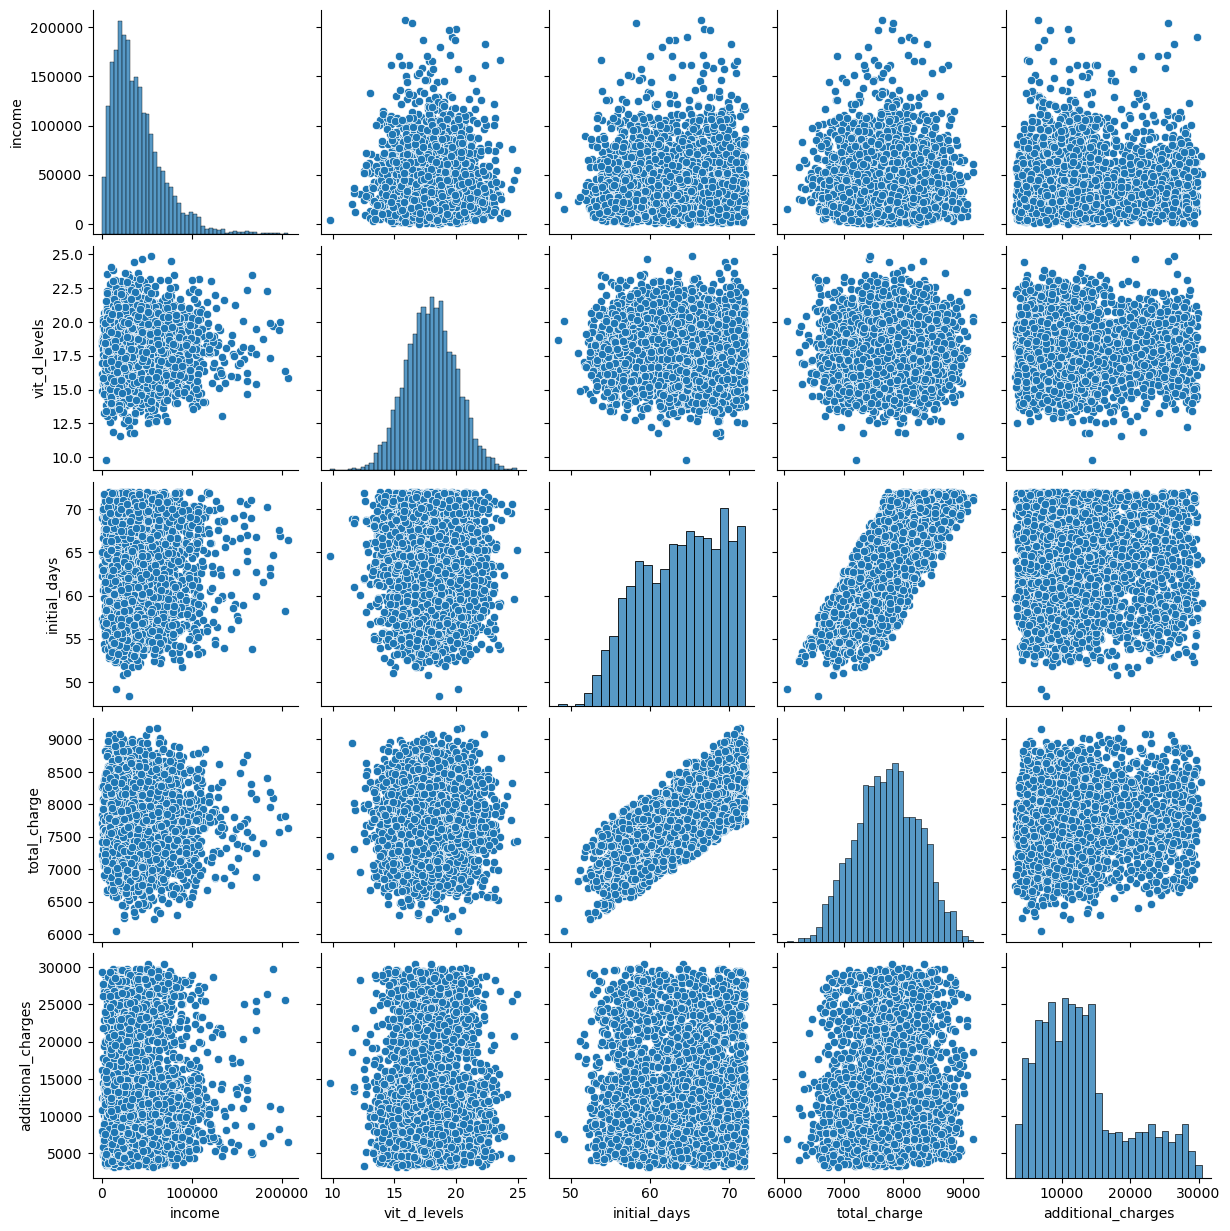

In [9]:
sns.pairplot(num_df)

<strong>Remove Unnecessary Columns</strong><br>
Remove numeric columns not mentioned in <em>Section C2</em>.

In [10]:
num_df = num_df.drop(columns=['income', 'vit_d_levels', 'initial_days'])
num_df

,total_charge,additional_charges
5000,8333.857,28753.060
5001,7331.058,14157.580
5005,7285.025,5950.286
5006,6997.381,10368.460
5008,7780.328,9365.140
...,...,...
9992,7894.201,17367.970
9996,7741.690,28507.150
9997,8276.481,15281.210
9998,7644.483,7781.678


<strong>Scale the Data</strong><br>
Use StandardScaler to scale the data set.

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(num_df.values)
clean_df = pd.DataFrame(scaled_features, index = num_df.index, columns = num_df.columns)

<strong>Plot the Data Frame</strong><br>
Display a pair plot of the final data frame.

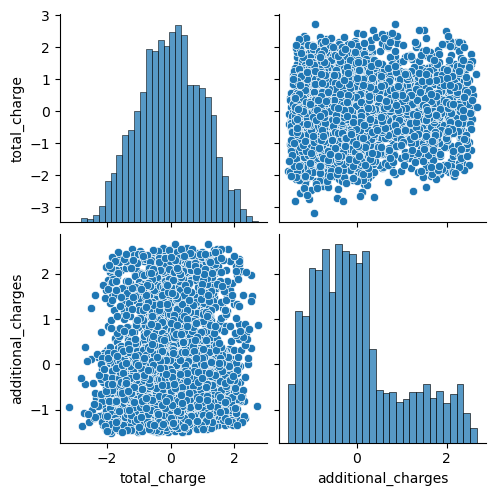

In [12]:
sns.pairplot(clean_df)

## Analysis

<strong>Perform Silhouette Method</strong><br>
<p>Check for the optimal value of K using the Silhouette Method.</p>

In [14]:
sil = []
sil_k = 10
sil_data = clean_df

for k in range(2, sil_k+1):
    sil_model = KMeans(n_clusters = k).fit(sil_data)
    labels = sil_model.labels_
    sil.append(silhouette_score(sil_data, labels, metric = 'euclidean'))

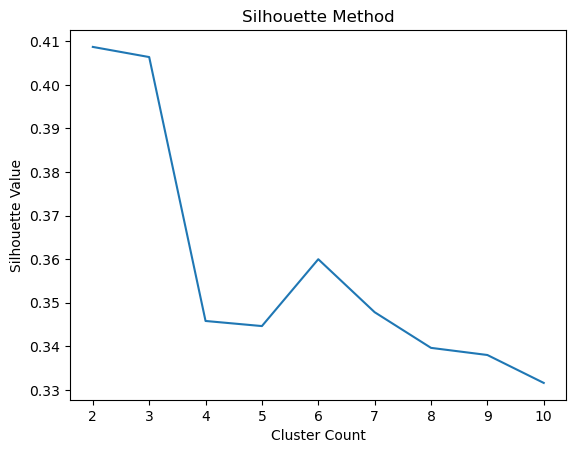

In [15]:
plt.plot(range(2, sil_k+1), sil)
plt.title('Silhouette Method')
plt.xlabel('Cluster Count')
plt.ylabel('Silhouette Value')
plt.show()

<strong>Display Silhouette Score</strong><br>
<p>The Silhouette Score suggests the optimal value of K is 2.</p>


In [16]:
for i in range(2,7):
    sil_score_model = KMeans(n_clusters = i, random_state = 42).fit(clean_df)
    labels = sil_score_model.predict(clean_df)
    sil_score = silhouette_score(clean_df, labels)
    print('Silhouette Score(n={}): {:.8f}'.format(i, sil_score))

Silhouette Score(n=2): 0.40989567
Silhouette Score(n=3): 0.40639645
Silhouette Score(n=4): 0.34425053
Silhouette Score(n=5): 0.34463895
Silhouette Score(n=6): 0.36013084


<strong>Fit the Model with K-value of 2</strong><br>
Fit the model using the optimal value gathered from the Silhouette Score and plot the results.

Text(0.5, 1.0, 'KMeans Cluster Value of 2')

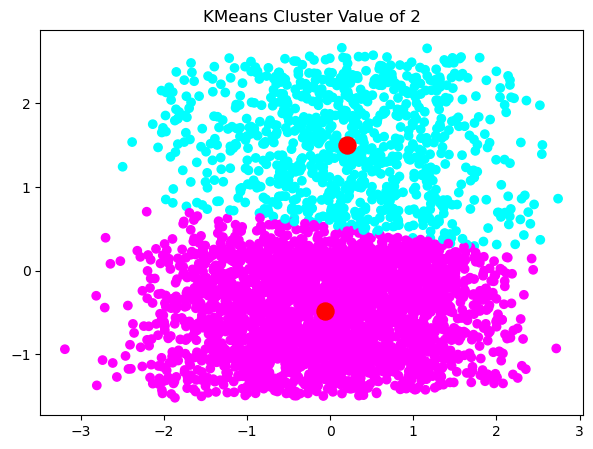

In [17]:
sil_model = KMeans(n_clusters = 2, random_state = 10)
sil_model.fit(clean_df)

fig, ax = plt.subplots(figsize = (7, 5))
ax.scatter(x = clean_df.iloc[:,0], y = clean_df.iloc[:,1], c = sil_model.labels_, cmap = 'cool')
ax.scatter(x = sil_model.cluster_centers_[:,0],
          y = sil_model.cluster_centers_[:,1], color = 'red', s = 150)
plt.title('KMeans Cluster Value of 2')

<strong>Perform Elbow Method</strong><br>
<p>Check for the optimal value of K using the Elbow Method.</p>

In [18]:
inertia = []
elb_k = range(1, 10)
elb_data = clean_df

for k in elb_k:
    elb_model = KMeans(n_clusters = k).fit(elb_data)
    inertia.append(elb_model.inertia_)

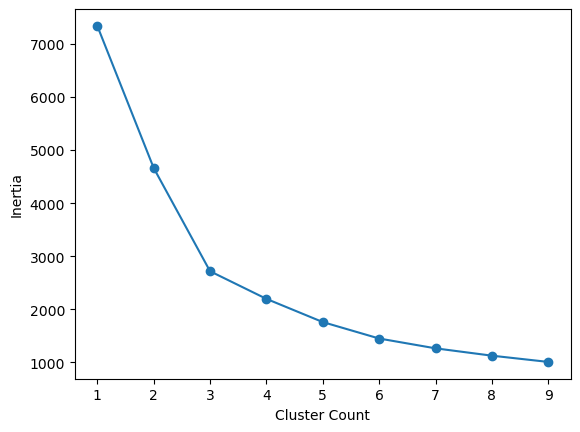

In [19]:
plt.plot(elb_k, inertia, '-o')

plt.xlabel('Cluster Count')
plt.ylabel('Inertia')
plt.xticks(elb_k)
plt.show()

<strong>Display the Inertia Values</strong><br>
<p>The Elbow Method suggests the optimal value of K is 3.</p>

In [20]:
for i in range(0, len(inertia)-1):
    print('Inertia Value:', i+1, (inertia[i] - inertia[i+1]))

Inertia Value: 1 2675.6300441289177
Inertia Value: 2 1944.9856471740623
Inertia Value: 3 520.359785064883
Inertia Value: 4 437.0446786559962
Inertia Value: 5 309.87329216079274
Inertia Value: 6 184.74853805644102
Inertia Value: 7 138.29769006849892
Inertia Value: 8 117.7160132992068


<strong>Fit the Model with K-value of 3</strong><br>
Fit the model using the optimal value gathered from the Elbow Method and plot the results.

Text(0.5, 1.0, 'KMeans Cluster Value of 3')

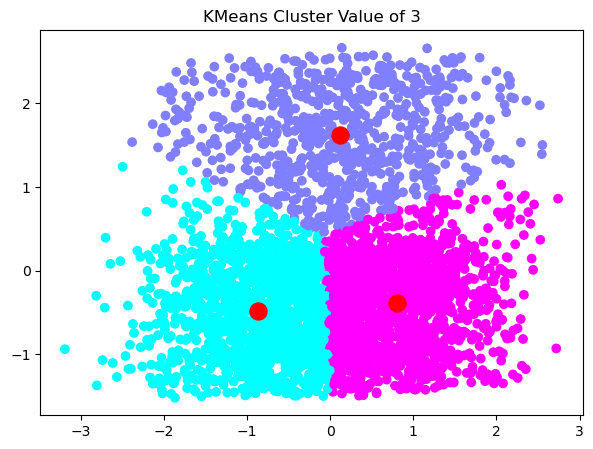

In [21]:
elbow_model = KMeans(n_clusters = 3, random_state = 10)
elbow_model.fit(clean_df)

fig, ax = plt.subplots(figsize = (7, 5))
ax.scatter(x = clean_df.iloc[:,0], y = clean_df.iloc[:,1], c = elbow_model.labels_, cmap = 'cool')
ax.scatter(x = elbow_model.cluster_centers_[:,0],
          y = elbow_model.cluster_centers_[:,1], color = 'red', s = 150)
plt.title('KMeans Cluster Value of 3')

<strong>Display Model Inertia</strong><br>
Display the inertia of the model with K-value of 3.

In [22]:
print('      Labels:', set(elbow_model.labels_))
print('     Inertia:', elbow_model.inertia_)
print('Observations:', len(elbow_model.labels_))

      Labels: {0, 1, 2}
     Inertia: 2717.3823255170446
Observations: 3669


## Summary and Implications

### Accuracy of K-means

<strong>Silhouette Method Accuracy</strong><br>
The Silhouette Score is calculated between -1 and 1, with 1 being the highest score.<br>
The Silhouette Score suggested an optimal K-value of 2, which had a score of 0.40989567.

<strong>Elbow Method Accuracy</strong><br>
The Elbow Method plots though n number of K-values to determine the optimal K-value based on inertia.<br>
When the inertia no longer has a significant decrease, it creates a visual 'elbow' on the plot.
The value at the elbow is considered the optimal value of K.<br>
The Elbow Method suggested an optimal K-value of 3, which had an inertia of 520.2334304156739 and was at the 'elbow' point of the graph.

### Results

The Silhouette Score and the Elbow Method were used during the analysis and gathered different results.<br>
The results of both models are as follows:

The Silhouette Method was performed and suggested the optimal value of K for the analysis was two. The result was two distinct clusters relative to readmitted patients.<br>

The Elbow Method was also performed and suggested the optimal value of k for the analysis was three. The result was three distinct clusters relative to readmitted patients.<br>

The Silhouette Score is generally accepted as more accurate, so the model with two distinct clusters should be given more consideration.<br>

<strong>Results</strong><br>
The data from the readmitted patient data frame had the following cluster labels:

In [23]:
sil_df = readmit_df.copy()
sil_df['label_'] = sil_model.labels_
sil_df.head(10)

,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,...,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,label_
5000,87,47689.17,Yes,19.53962,5,0,1,No,Emergency Admission,Yes,...,No,No,No,No,No,Blood Work,70.29151,8333.857,28753.060,0
5001,87,100114.70,Yes,18.04371,4,0,1,No,Elective Admission,No,...,No,No,Yes,No,Yes,Blood Work,64.93704,7331.058,14157.580,1
5005,32,58038.10,Yes,15.16530,4,0,1,No,Observation Admission,No,...,No,No,No,Yes,No,Blood Work,59.33979,7285.025,5950.286,1
5006,61,11346.70,Yes,18.00847,6,0,0,No,Emergency Admission,No,...,Yes,No,No,No,No,CT Scan,54.31234,6997.381,10368.460,1
5008,28,18828.75,Yes,17.05505,6,4,0,No,Elective Admission,Yes,...,No,No,Yes,Yes,No,Blood Work,68.58989,7780.328,9365.140,1
5009,76,29594.62,Yes,17.80768,4,0,0,No,Elective Admission,No,...,No,Yes,No,No,No,Blood Work,60.17843,6872.691,12557.570,1
5010,37,51529.11,Yes,19.56648,5,2,0,Yes,Emergency Admission,No,...,No,Yes,No,No,No,Intravenous,66.02687,8349.668,7200.749,1
5013,67,51301.46,Yes,15.13663,4,1,0,No,Emergency Admission,No,...,Yes,No,Yes,No,Yes,Intravenous,60.03045,7845.996,11956.610,1
5014,67,36232.28,Yes,18.04329,6,1,0,No,Elective Admission,No,...,No,Yes,Yes,Yes,Yes,Blood Work,62.52661,7257.308,11133.060,1
5015,64,18299.79,Yes,18.66311,5,3,0,Yes,Emergency Admission,Yes,...,No,No,No,No,No,Blood Work,63.32927,7816.550,21554.630,0


The goal of the analysis was "to find underlying similarities between patients who were readmitted to the hospital within 30 days of an initial stay".<br>

The data was isolated in Part C3 to <em>only</em> include records for patients who were readmitted within 30 days, this means the analysis was performed on, and only includes, readmitted patient data.<br>

The Silhouette Score determined the optimal value of k was two. The result of k=2 was two distinct clusters of readmitted patient data, since only readmitted patient records were included in the analysis.<br>

<strong>Implications</strong><br>

The analysis resulted in two distinct clusters of readmitted patient data, which implies that K-Means Clustering can successfully discover two distinct cluster centers in readmitted patients, as evidenced by the data frame above.

### Limitation of the Analysis

<p>In KMeans Clustering, the initial value of K must be manually selected, which is a limitation because the initial K-value may not be optimal.<br>
Choosing an inappropriate k-value can skew the results of the analysis and have unexpected results.<br>
 The Silhouette Score and Elbow Method can be used to determine the optimal value of K, but the two methods came up with different scores during the analysis.</p>
<p>KMeans cannot be accurately performed on categorical data, which is another limitation. The data set contains valuable categorical data that could not be included in the analysis. </p>


### Recommend Course of Action

<p>Kmeans Clustering was successful in finding and clustering underlying similarities between readmitted patients. <br>
The analysis resulted in two distinct clusters of readmitted patient data. The organization can further study these two clusters to identify what categories separate one cluster of readmitted patients from the other.<br> One group of readmitted patients may have medical attributes that can be treated differently, which could prevent future readmissions.
Reducing the number of readmitted patients will help the organization prevent fines from the Centers for Medicare and Medicaid Services.</p>


## References
<ul>
    <li>Al-Masri, Anas. (2019). How does K-Means Clustering in Machine Learning Work? <em>Toward Data Science.</em><br>medium.com/towards-data-science/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0</li>
<li>Understanding K-means Clustering in Machine Learning.(2018). <em>TowardDataScience.<br> </em>towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1</li>
    </ul>